In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

file_path = 'Bitcoin Historical Data6.csv'
data = pd.read_csv(file_path)
def convert_volume(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if 'K' in volume_str:
        return float(volume_str.replace('K', '').replace(',', '')) * 1000
    elif 'M' in volume_str:
        return float(volume_str.replace('M', '').replace(',', '')) * 1000000
    elif 'B' in volume_str:
        return float(volume_str.replace('B', '').replace(',', '')) * 1000000000
    else:
        return float(volume_str.replace(',', ''))


data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Price'] = data['Price'].str.replace(',', '').astype(float)
data['Open'] = data['Open'].str.replace(',', '').astype(float)
data['High'] = data['High'].str.replace(',', '').astype(float)
data['Low'] = data['Low'].str.replace(',', '').astype(float)
data['Vol.'] = data['Vol.'].apply(convert_volume)

data = data.sort_values(by='Date')
data.reset_index(drop=True, inplace=True)

data['Price_Lag1'] = data['Price'].shift(1)  
data['Open_Lag1'] = data['Open'].shift(1)    
data['High_Lag1'] = data['High'].shift(1)    
data['Low_Lag1'] = data['Low'].shift(1)      
data['Vol_Lag1'] = data['Vol.'].shift(1)
data['Price_MA_7'] = data['Price'].shift(1).rolling(window=7).mean()
data = data.dropna()
data = data[data['Date'] >= '2013-01-01']
data.reset_index(drop=True, inplace=True)
data

,Date,Price,Open,High,Low,Vol.,Change %,Price_Lag1,Open_Lag1,High_Lag1,Low_Lag1,Vol_Lag1,Price_MA_7
0,2013-01-01,13.3,13.5,13.6,13.2,28410.0,-1.55%,13.5,13.4,13.6,13.4,15050.0,13.428571
1,2013-01-02,13.3,13.3,13.4,13.2,17970.0,0.00%,13.3,13.5,13.6,13.2,28410.0,13.414286
2,2013-01-03,13.4,13.3,13.5,13.3,18030.0,0.90%,13.3,13.3,13.4,13.2,17970.0,13.385714
3,2013-01-04,13.5,13.4,13.5,13.3,29640.0,0.75%,13.4,13.3,13.5,13.3,18030.0,13.385714
4,2013-01-05,13.4,13.5,13.6,13.3,21330.0,-0.44%,13.5,13.4,13.5,13.3,29640.0,13.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,2024-04-04,68496.5,65968.4,69238.8,65096.3,100300.0,3.84%,65963.0,65443.6,66844.8,64559.0,88460.0,68949.128571
4112,2024-04-05,67830.6,68498.7,68692.2,66023.3,88970.0,-0.97%,68496.5,65968.4,69238.8,65096.3,100300.0,68625.471429
4113,2024-04-06,68890.6,67830.5,69632.0,67467.2,41480.0,1.56%,67830.6,68498.7,68692.2,66023.3,88970.0,68333.885714
4114,2024-04-07,69360.4,68897.3,70285.8,68849.4,46990.0,0.68%,68890.6,67830.5,69632.0,67467.2,41480.0,68230.900000


In [46]:
dates = data['Date']

X = data[['High_Lag1', 'Low_Lag1', 'Vol_Lag1', 'Open_Lag1', 'Price_Lag1', 'Price_MA_7']]
y = data['Price']

train_size = int(len(X) * 0.7)  
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = dates[:train_size], dates[train_size:]

In [60]:
from pprint import pprint

model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)

[ 4.43040932e-02  1.54151787e-02 -7.90427415e-06 -1.02636103e-02
  9.65824069e-01 -1.52829567e-02]


In [48]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
score = model.score(X_test, y_test)

RMSE: 2802.9336928517578
SCORE: 95.80166727064137


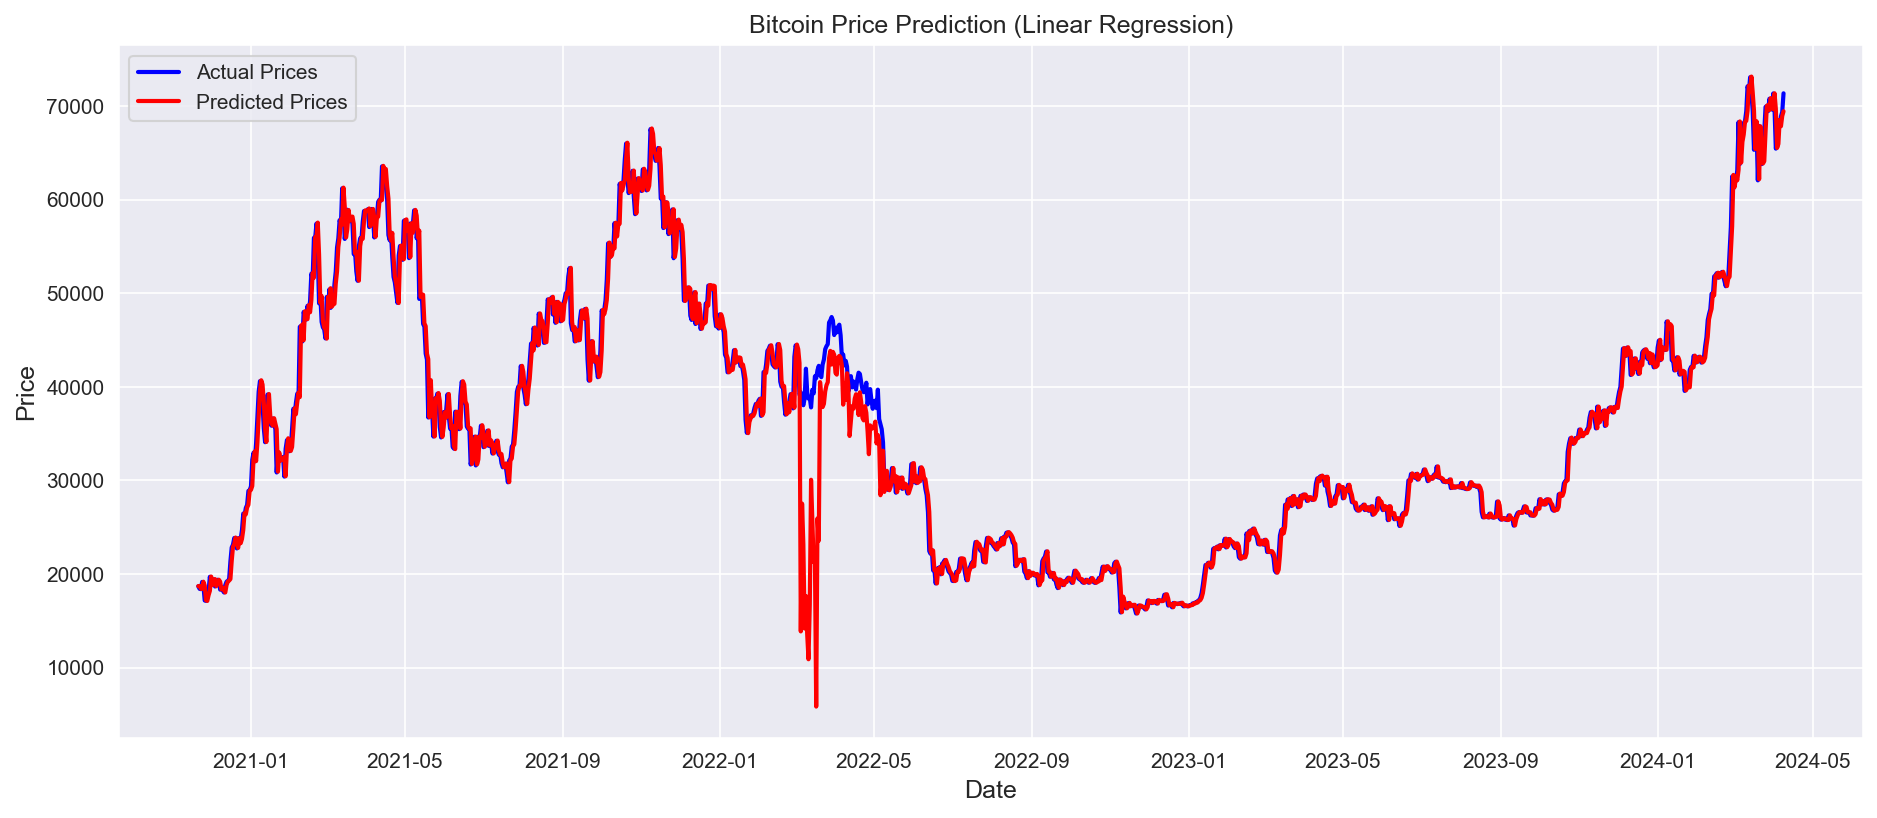

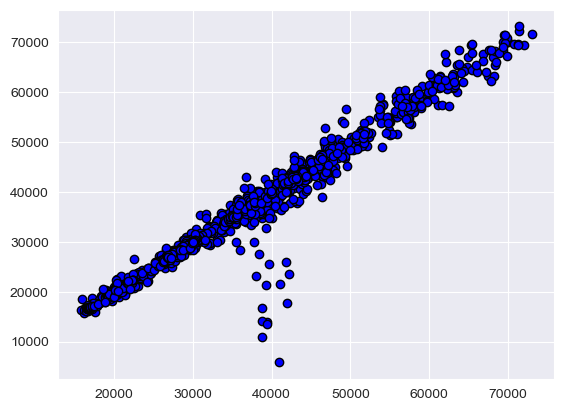

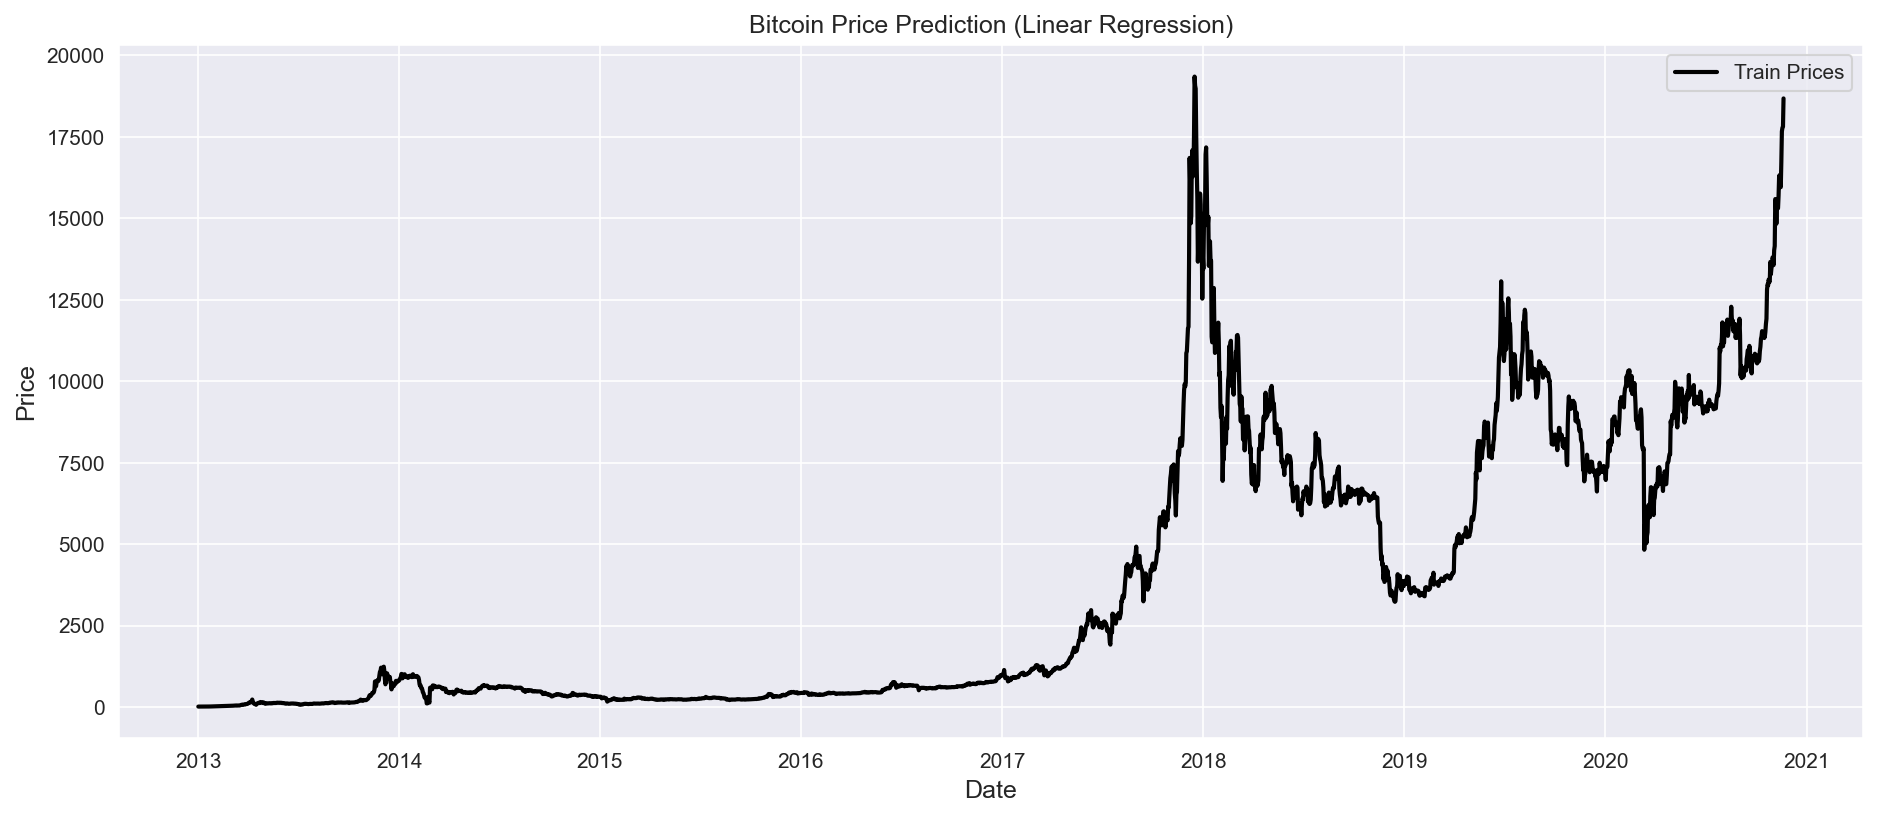

In [49]:
plt.figure(figsize=(15,6), dpi=150)
plt.plot(dates_test, y_test, label="Actual Prices", color="blue", lw=2)
plt.plot(dates_test, y_pred, label="Predicted Prices", color="red", lw=2)
# plt.plot(dates_train, y_train, label="Train Prices", color="black", lw=2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Bitcoin Price Prediction (Linear Regression)')
plt.legend()
plt.grid(True)
print(f"RMSE: {rmse}\n" f"SCORE: {score * 100}")
plt.show()

plt.scatter(y_test, y_pred, color="blue", edgecolors='k', label="Actual Prices")
plt.show()

plt.figure(figsize=(15,6), dpi=150)
plt.plot(dates_train, y_train, label="Train Prices", color="black", lw=2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Bitcoin Price Prediction (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
data['Is_long'] = (data['Price'] > data['Price'].shift(1)).astype(int)
dates = data['Date']

X = data[['High_Lag1', 'Low_Lag1', 'Vol_Lag1', 'Open_Lag1', 'Price_Lag1', 'Price_MA_7']]
y = data['Is_long']

train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [51]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [52]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Точность модели: {accuracy * 100}")
print("Отчет по классификации:\n", report)

Точность модели: 53.036437246963565
Отчет по классификации:
               precision    recall  f1-score   support

           0       0.52      0.74      0.61       615
           1       0.56      0.32      0.41       620

    accuracy                           0.53      1235
   macro avg       0.54      0.53      0.51      1235
weighted avg       0.54      0.53      0.51      1235



In [53]:
from sklearn.preprocessing import PolynomialFeatures

dates = data['Date']

X = data[['High_Lag1', 'Low_Lag1', 'Vol_Lag1', 'Open_Lag1', 'Price_Lag1', 'Price_MA_7']]
y = data['Price']


train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = dates[:train_size], dates[train_size:]
degree = 2  
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [54]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = model.score(X_test_poly, y_test)

RMSE: 1158.0125725720568
SCORE: 99.18460336923087


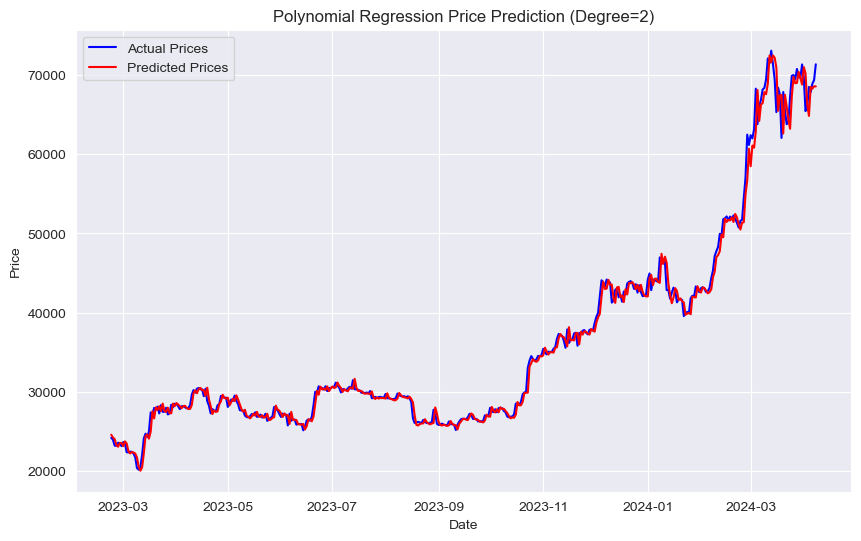

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].iloc[len(data) - len(y_test):].reset_index(drop=True), y_test.reset_index(drop=True), label="Actual Prices", color="blue")
plt.plot(data['Date'].iloc[len(data) - len(y_pred):].reset_index(drop=True), y_pred, label="Predicted Prices", color="red")
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Polynomial Regression Price Prediction (Degree={degree})')
plt.legend()
plt.grid(True)

print(f"RMSE: {rmse}\nSCORE: {score * 100}")
plt.show()

In [57]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import PolynomialFeatures

dates = data['Date']

X = data[['High_Lag1', 'Low_Lag1', 'Vol_Lag1', 'Open_Lag1', 'Price_Lag1', 'Price_MA_7']]
y = data['Price']

train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = dates[:train_size], dates[train_size:]

tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

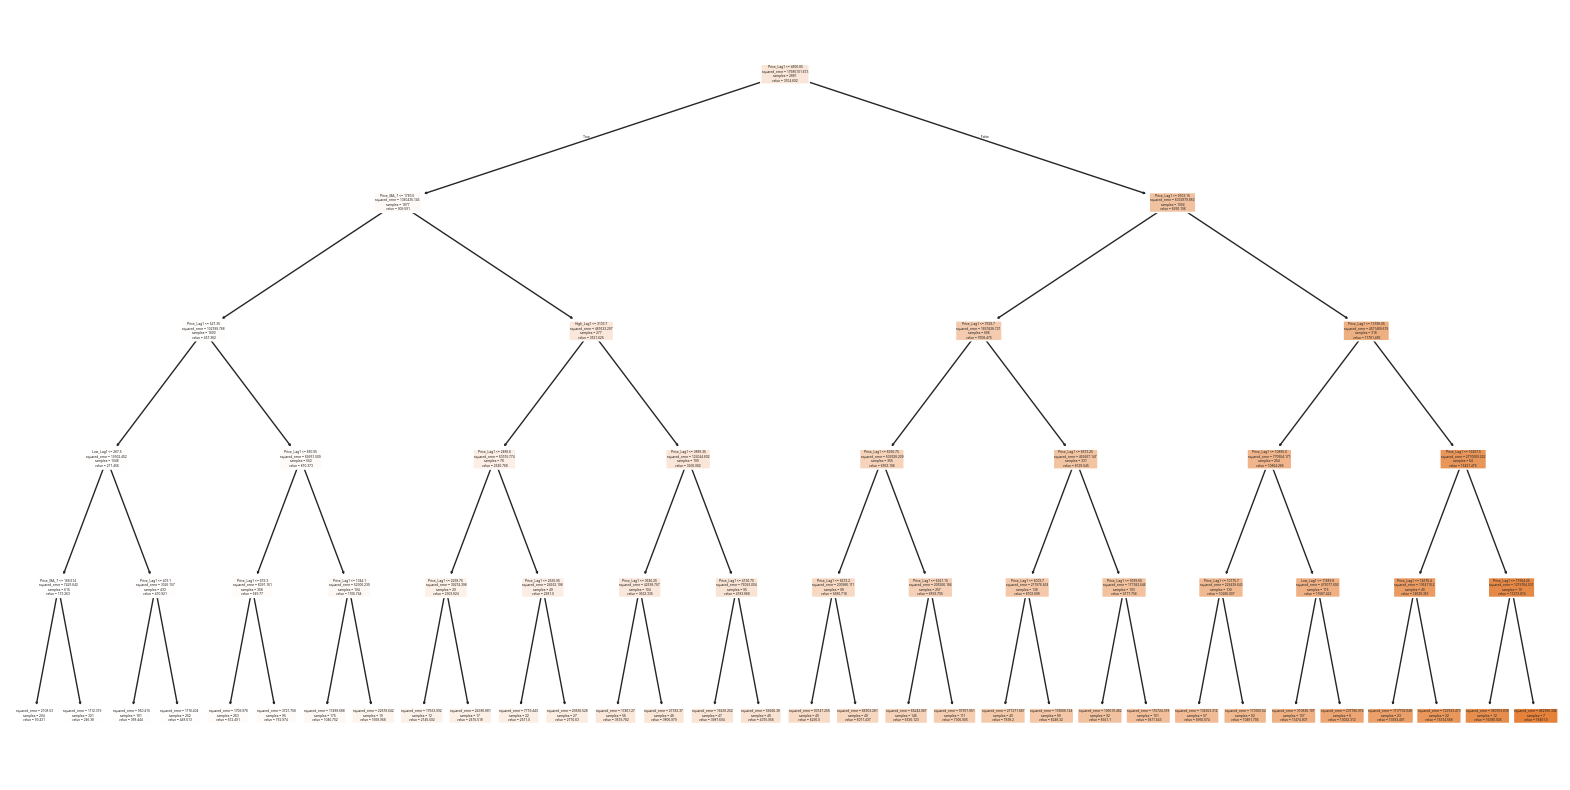

RMSE для дерева решений: 22216.184267664674


In [58]:
from sklearn.tree import export_graphviz
import pydotplus
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                               filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

y_pred = tree_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()
tree_graph_to_png(tree_model, X.columns, 'tree.png')

print(f"RMSE для дерева решений: {rmse}")